<a href="https://colab.research.google.com/github/CHMcCartney/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Apr 15 18:24:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


2.6.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving / intelligent vehicles
2. Home secutiyy
3. Healthcare imaging (cancer detection in particular)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Overfitting occurs when a model fits the characteristics of the training model too specifically to generalize well to unseen testing data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Regularization techniques, Implementing new models (simpler models potentially such as Linear Regression instead of Multiple Regression), Cleaning up dataset / reducing noise

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# Pretty sick, reminds me of concepts from Deep Learning course from undergrad

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [4]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root=".", train=True, download=True, transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.63MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.87MB/s]


In [5]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [9]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


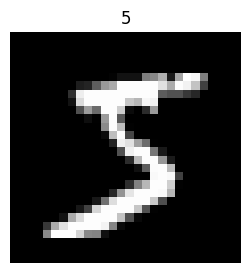

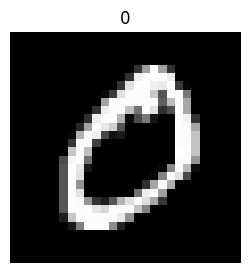

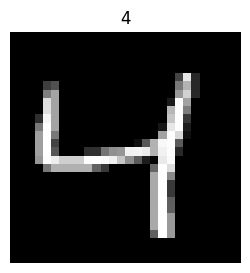

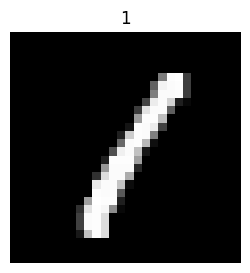

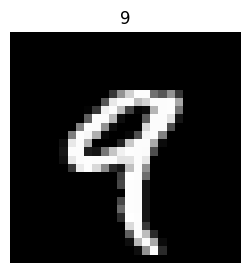

In [10]:
import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d6fb1ce1290>,
 <torch.utils.data.dataloader.DataLoader at 0x7d6fb1ceb790>)

In [12]:
for sample in next(iter(train_dataloader)): # Selecting next item in train_dataloader iterable
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [13]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn

In [15]:
class MNIST_model(torch.nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # Could also use nn.MaxPool2d(2) because it will by default set stride == kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x):       # Hidden units is the number of feature maps (aka channels or filters) - represents the number of distinct features the network is learning at that stage (depth or number of channels)
    x = self.conv_block_1(x)  # Input is (1, 28, 28), [1 channel grayscale image] Output is (hidden_units, 14, 14) due to MaxPool2d with kernel_size=2
    x = self.conv_block_2(x)  # Input is (hidden_units, 14, 14), Output is (hidden_units, 7, 7)
    x = self.classifier(x)    # Input is (hidden_units, 7, 7), flatten turns it into 1D vector of hidden_units * 7 * 7
    return x

In [16]:
model = MNIST_model(input_shape=1, hidden_units=10, output_shape=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2214, -0.1249, -0.0873],
                        [-0.0038, -0.1531,  0.1682],
                        [ 0.1604,  0.1158,  0.0040]]],
              
              
                      [[[ 0.1142, -0.1704,  0.2589],
                        [ 0.1880, -0.1726, -0.0405],
                        [-0.0657, -0.0524, -0.1162]]],
              
              
                      [[[-0.3127,  0.0078, -0.0346],
                        [-0.1484,  0.0893, -0.2522],
                        [ 0.2543,  0.2234,  0.0183]]],
              
              
                      [[[-0.3096,  0.2005, -0.2610],
                        [ 0.1508, -0.0784, -0.1356],
                        [-0.0380, -0.0876,  0.0162]]],
              
              
                      [[[ 0.0132, -0.0154,  0.0783],
                        [-0.1579,  0.2557, -0.1940],
                        [ 0.2391, -0.0998, -0.1261]]],
              
              
      

In [19]:
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
print(dummy_x.shape)
model(dummy_x)

torch.Size([1, 1, 28, 28])


tensor([[ 0.0763, -0.0599,  0.0292,  0.0108, -0.0166,  0.0509,  0.0356,  0.0531,
          0.0132, -0.0444]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [20]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [21]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [23]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(input_shape=1, hidden_units=10, output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_cpu.train()
    X, y = X.to('cpu'), y.to('cpu')

    # Forward pass
    y_pred = model_cpu(X)
    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # Optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    # Step the optimizer
    optimizer.step()

  # Adjust train loss for # batches
  train_loss /= len(train_dataloader)

  ### Testing Loop
  test_loss_total = 0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.300 | Test Loss: 0.075
Epoch: 1 | Train Loss: 0.074 | Test Loss: 0.056
Epoch: 2 | Train Loss: 0.057 | Test Loss: 0.045
Epoch: 3 | Train Loss: 0.049 | Test Loss: 0.041
Epoch: 4 | Train Loss: 0.042 | Test Loss: 0.047
CPU times: user 3min 14s, sys: 501 ms, total: 3min 14s
Wall time: 3min 15s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [25]:
print(test_data[0][0].shape)
print(test_data[0][0].squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


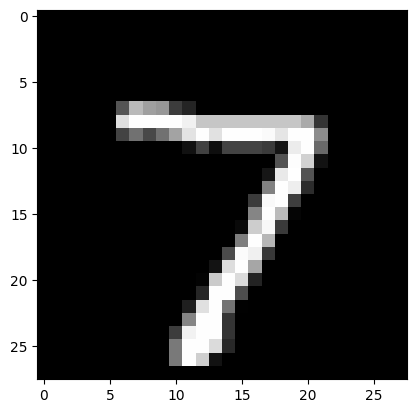

In [24]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [27]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0).to('cpu')) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7])

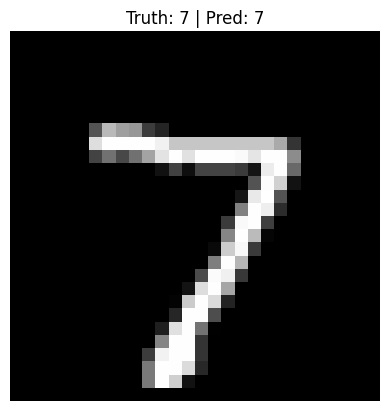

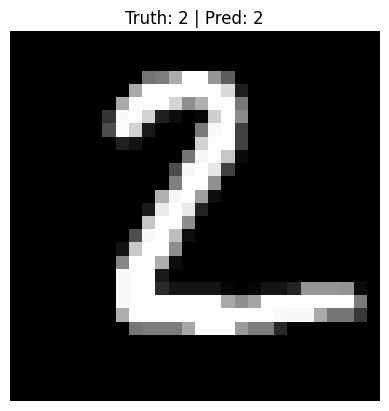

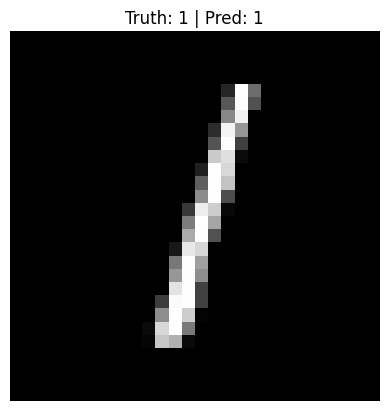

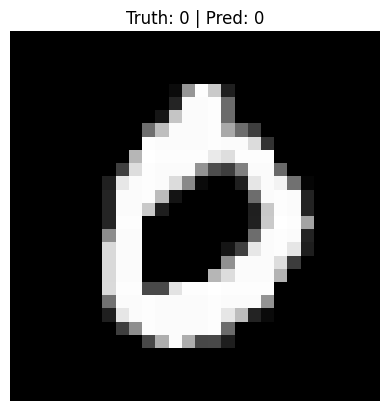

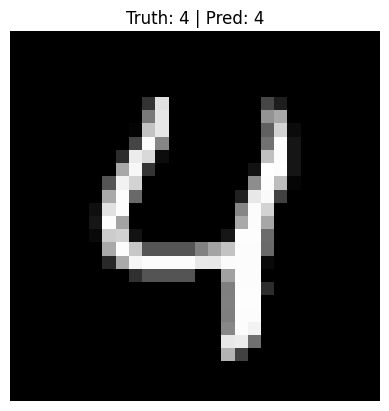

In [30]:
device = 'cpu'

num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_cpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [31]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 805.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [32]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


In [34]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_cpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_cpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [35]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

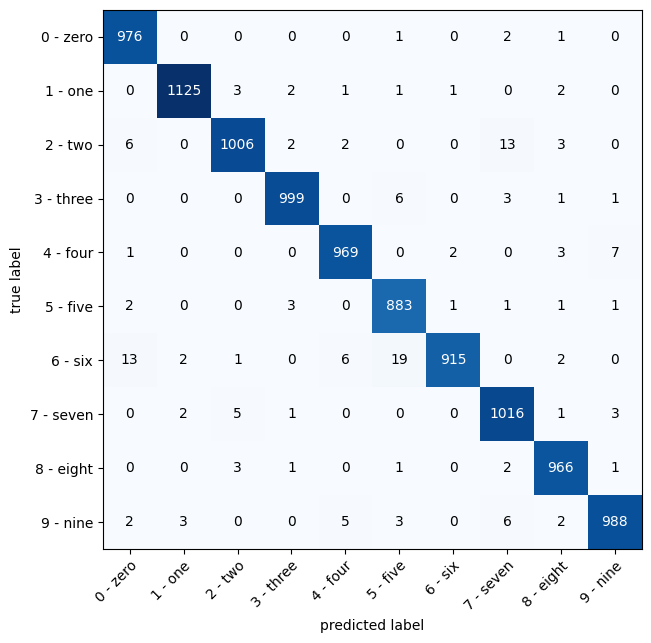

In [36]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [37]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [43]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=2,
                       stride=1,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 65, 65])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [44]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.27MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]


(60000, 10000)

In [45]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
# Datasets --> Dataloader step
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [47]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [49]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.907 | Train acc: 0.68 | Test loss: 179.606 | Test acc: 0.78
Epoch: 1 | Train loss: 0.486 | Train acc: 0.82 | Test loss: 141.684 | Test acc: 0.84
Epoch: 2 | Train loss: 0.417 | Train acc: 0.85 | Test loss: 132.639 | Test acc: 0.85
Epoch: 3 | Train loss: 0.381 | Train acc: 0.86 | Test loss: 119.806 | Test acc: 0.86
Epoch: 4 | Train loss: 0.356 | Train acc: 0.87 | Test loss: 118.144 | Test acc: 0.87


In [50]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [51]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1341

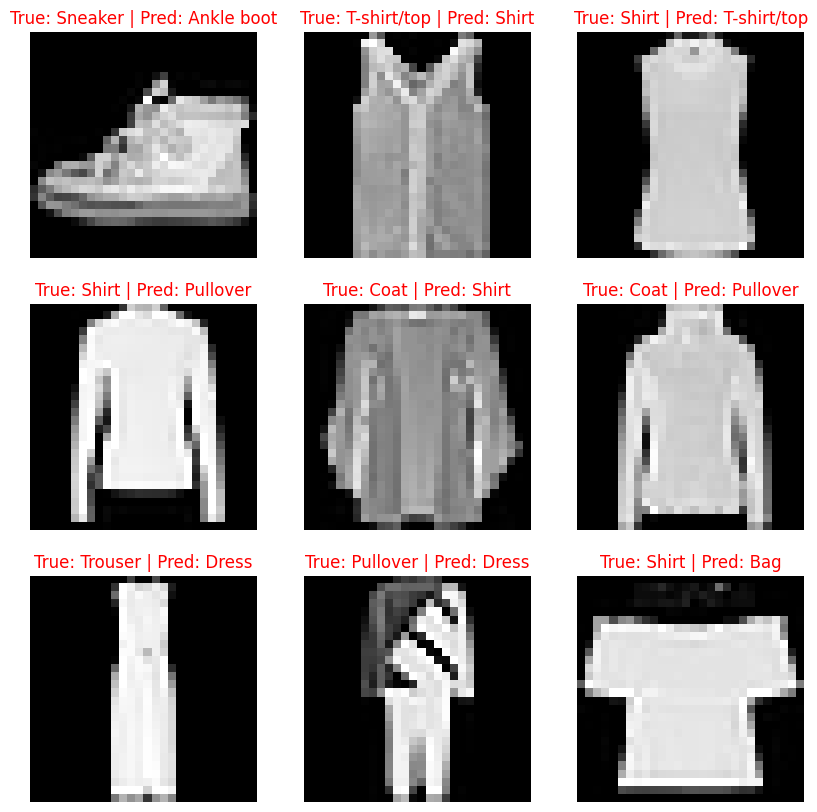

In [52]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);